<a href="https://colab.research.google.com/github/asu-trans-ai-lab/OSM2GMNS/blob/master/osm2gmns_quickstart_Gilbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __OSM2GMNS Quickstart Notebook__

OSM2GMNS is a Python package that helps generate high-fidelity mesoscopic transportation network models from OpenStreetMap data. This enables even the smallest transportation authorities to begin analysis with a high quality network model for future analysis. 


# 1. Data Collection
We rely on a few open-source projects to gather the raw data to start our analysis. Export data from your area of interest from the following sources.
 * __OpenStreetMap base map__: https://www.openstreetmap.org/export
   * __Geofabrik__: Alternative for non-rectangular Areas of Interest: http://download.geofabrik.de/
 * __Bike Transport Info__ (Optional):  https://extract.bbbike.org

For this demonstration, we'll use sample data from the ASU Transit AI Lab Github

osm2gmns also enables users to download OSM data within the region of interest using a built-in function. A region can be a state, city, or even university. On OpenStreetMap homepage, search the region name to get its unique relation id. The following example shows how to download Tempe city OSM data using function downloadOSMData.

https://www.openstreetmap.org/#map=18/33.42141/-111.93472&layers=DG 

# 2. Install the osm2gmns package

In [1]:
!pip install osm2gmns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 985 kB/s 
     |████████████████████████████████| 1.3 MB 9.5 MB/s 


# 3. Create a network model from OpenStreetMap exports

In [2]:
# Import osm2gmns with the alias as "og" (easier to type)
import osm2gmns as og
# relation id for Manhattan  is 8398124
# relation id for City of Tempe is 110833.
# relation id for city of Gilbert is 110803
og.downloadOSMData(110803, 'map.osm')
# Generate a net from the Tempe, AZ OpenStreetMap export and include Points of Interest (POI=True)


osm2gmns, 0.7.1
valid reponses got from API server.
receving data...
map data has been written to map.osm


arguments used for network parsing:
  filename: map.osm
  network_types: ('auto',)
  link_types: ('motorway', 'trunk', 'primary', 'secondary', 'tertiary')
  POI: False
  POI_sampling_ratio: 1.0
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
  number of nodes: 4165, number of links: 5907, number of pois: 0


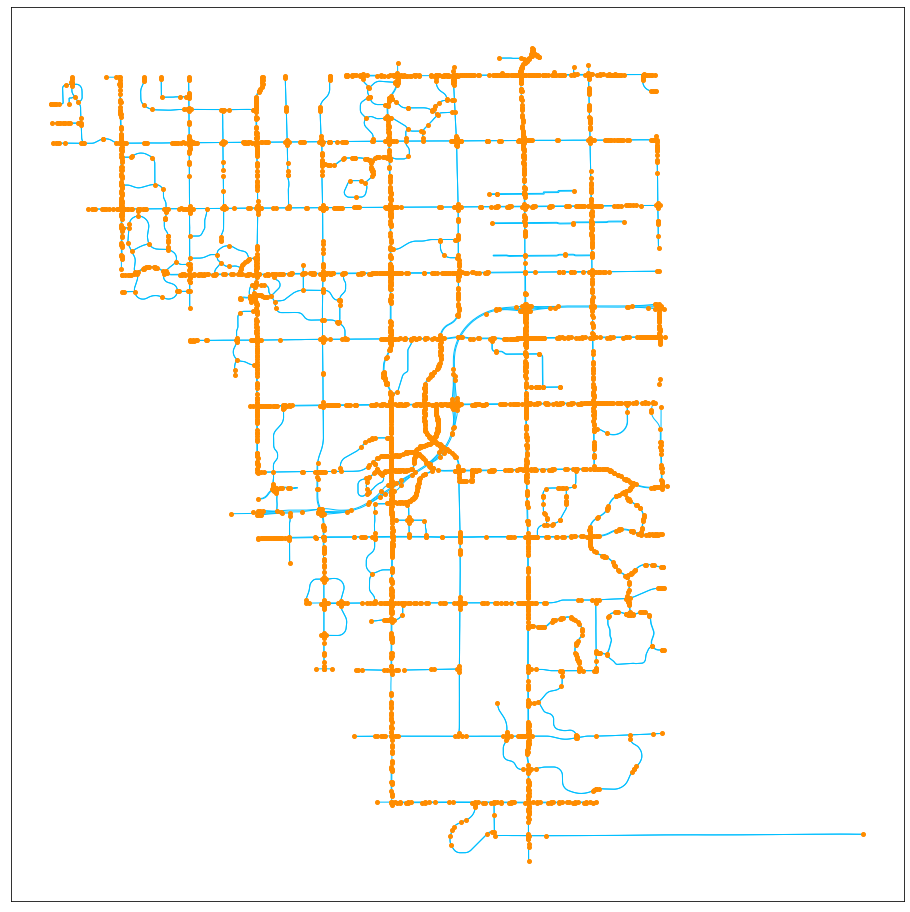

In [3]:
input_file = 'map.osm'
net = og.getNetFromFile(input_file, link_types=('motorway','trunk','primary','secondary', 'tertiary')) 

# Use og.show(net) to visualize the network model
og.show(net)

#4. Modify the network model 

## Example: Consolidate Complex Intersections 
Intersections can have lots of nodes representing different turn lanes, crosswalks, etc. 

Using og.consolidateComplexIntersections(net), we can combine nodes in intersections into a single node to make analysis faster and simpler

In [4]:
og.consolidateComplexIntersections(net)
og.show(net)

Consolidating Complex Intersections
    0 intersections have been consolidated


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f81fc0be8b0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f81fafaa4c0> (for post_execute):


KeyboardInterrupt: ignored

## Example: Points of Interest

We can connect Points of Interest (POIs) to the network model. Nodes representing the center (centroids) of POIs are generated. These nodes are connected with a link to the nearest node on the rest of the network

arguments used for network parsing:
  filename: map.osm
  network_types: ('auto',)
  link_types: ('motorway', 'trunk', 'primary', 'secondary', 'tertiary')
  POI: True
  POI_sampling_ratio: 0.05
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
    generating POIs
  number of nodes: 4165, number of links: 5907, number of pois: 4587


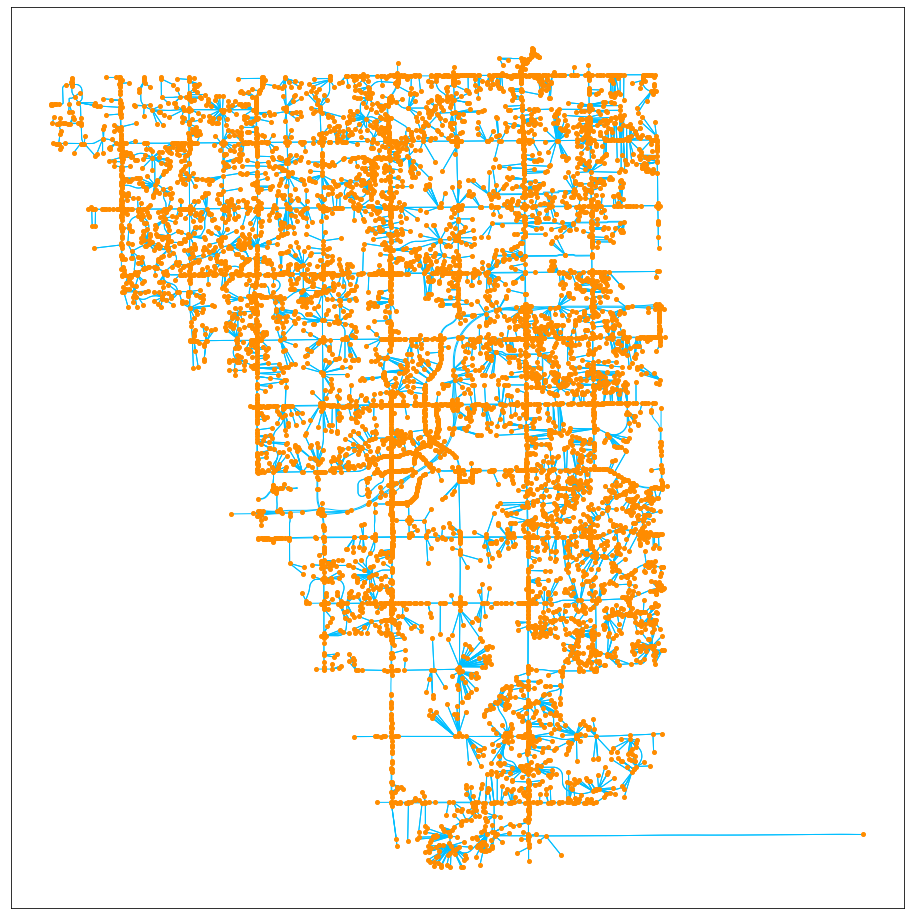

In [5]:
net = og.getNetFromFile('map.osm', link_types=('motorway','trunk','primary','secondary','tertiary'), POI=True, POI_sampling_ratio=0.05)
og.connectPOIWithNet(net)
og.show(net)

#5. Export transportation network model

We can export our transportation network model to a CSV format for ease of use in further analysis with other systems. 

og.outputNetToCSV(...) will generate two files: node.csv representing nodes, and link.csv representing links (edges) between nodes.

In [6]:

og.outputNetToCSV(net)

Outputting Network Files


In [7]:
"""
Take a peek at the format of the CSVs using the Pandas library
Loading the CSV files gives us a DataFrame object which is very heavily used in 
data science and analysis. 

For more information on how this data is organized, check out the GMNS specification

https://github.com/zephyr-data-specs/GMNS/pull/54

"""

import pandas as pd

node_dataframe = pd.read_csv("node.csv")
node_dataframe.head()

,name,node_id,osm_node_id,osm_highway,zone_id,ctrl_type,node_type,activity_type,is_boundary,x_coord,y_coord,intersection_id,poi_id,notes
0,NaN,0,3.870347e+09,traffic_signals,NaN,signal,NaN,NaN,NaN,-111.719456,33.383893,NaN,NaN,NaN
1,NaN,1,5.201485e+09,NaN,NaN,NaN,NaN,NaN,NaN,-111.718235,33.383516,NaN,NaN,NaN
2,NaN,2,5.367568e+09,NaN,NaN,NaN,NaN,NaN,NaN,-111.729097,33.211979,NaN,NaN,NaN
3,NaN,3,1.978267e+09,NaN,NaN,NaN,NaN,NaN,NaN,-111.729198,33.212797,NaN,NaN,NaN
4,NaN,4,3.240434e+09,NaN,NaN,NaN,NaN,NaN,NaN,-111.729253,33.216429,NaN,NaN,NaN


In [8]:
link_dataframe = pd.read_csv("link.csv")
link_dataframe.head()

,name,link_id,osm_way_id,from_node_id,to_node_id,dir_flag,length,lanes,free_speed,capacity,link_type_name,link_type,geometry,allowed_uses,from_biway,is_link,VDF_fftt1,VDF_cap1
0,East Inverness Avenue,0,5573620.0,0,1,1,121.44,2.0,NaN,NaN,tertiary,5,"LINESTRING (-111.7194560 33.3838934, -111.7193...",auto,0,0,NaN,NaN
1,South Constellation Way,1,5586371.0,2,3,1,92.13,NaN,NaN,NaN,tertiary,5,"LINESTRING (-111.7290970 33.2119788, -111.7291...",auto,1,0,NaN,NaN
2,South Constellation Way,2,5586371.0,3,2,1,92.13,NaN,NaN,NaN,tertiary,5,"LINESTRING (-111.7291981 33.2127966, -111.7291...",auto,1,0,NaN,NaN
3,South Constellation Way,3,5586371.0,3,4,1,402.69,NaN,NaN,NaN,tertiary,5,"LINESTRING (-111.7291981 33.2127966, -111.7292...",auto,1,0,NaN,NaN
4,South Constellation Way,4,5586371.0,4,3,1,402.69,NaN,NaN,NaN,tertiary,5,"LINESTRING (-111.7292533 33.2164286, -111.7292...",auto,1,0,NaN,NaN


In [9]:
link_dataframe = pd.read_csv("poi.csv")
link_dataframe.head()

,name,poi_id,osm_way_id,osm_relation_id,building,amenity,leisure,way,geometry,centroid,area,area_ft2
0,NaN,0,1.052523e+09,NaN,house,NaN,NaN,NaN,"POLYGON ((-111.719917 33.275363, -111.719717 3...",POINT (-111.7198276 33.2754207),219.9,2367.5
1,NaN,1,1.113143e+09,NaN,yes,NaN,NaN,NaN,"POLYGON ((-111.783664 33.3117063, -111.7835434...",POINT (-111.7836063 33.3117696),153.5,1651.8
2,NaN,2,9.878410e+08,NaN,yes,NaN,NaN,NaN,"POLYGON ((-111.691347 33.366093, -111.691474 3...",POINT (-111.691448 33.366109),164.3,1768.9
3,NaN,3,9.877371e+08,NaN,yes,NaN,NaN,NaN,"POLYGON ((-111.696427 33.370076, -111.696542 3...",POINT (-111.6965007 33.3700134),168.7,1815.5
4,NaN,4,1.115769e+09,NaN,yes,NaN,NaN,NaN,"POLYGON ((-111.714205 33.230756, -111.713995 3...",POINT (-111.7140922 33.2308325),397.2,4275.9


#6. Basic analysis with Pandas

The node and link files are in CSV format, which can be used with a wide variety of programming languages, such as R, and programs, such as Excel.

Here, we show a quick demonstration of some simple analysis using Python

In [10]:
# From the previous cells, we have pandas DataFrame objects representing the node and link data for our model
print(node_dataframe.head(), link_dataframe.head())

   name  node_id   osm_node_id      osm_highway  zone_id ctrl_type  node_type  \
0   NaN        0  3.870347e+09  traffic_signals      NaN    signal        NaN   
1   NaN        1  5.201485e+09              NaN      NaN       NaN        NaN   
2   NaN        2  5.367568e+09              NaN      NaN       NaN        NaN   
3   NaN        3  1.978267e+09              NaN      NaN       NaN        NaN   
4   NaN        4  3.240434e+09              NaN      NaN       NaN        NaN   

   activity_type  is_boundary     x_coord    y_coord  intersection_id  poi_id  \
0            NaN          NaN -111.719456  33.383893              NaN     NaN   
1            NaN          NaN -111.718235  33.383516              NaN     NaN   
2            NaN          NaN -111.729097  33.211979              NaN     NaN   
3            NaN          NaN -111.729198  33.212797              NaN     NaN   
4            NaN          NaN -111.729253  33.216429              NaN     NaN   

   notes  
0    NaN  
1   